In [1]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [3]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [7]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [8]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1][[1,2,3]])

1    110.995648
2    108.594418
3    107.726849
dtype: float64

In [9]:
rates[[1,2,3]]

,1,2,3
0,0.030000,0.030000,0.030000
1,0.026496,0.031404,0.033207
2,0.024630,0.031446,0.033515
3,0.024611,0.030923,0.035870
4,0.023757,0.037439,0.032410
...,...,...,...
116,0.010742,0.034407,0.022976
117,0.013290,0.033768,0.024290
118,0.010753,0.033030,0.026860
119,0.011251,0.027146,0.026642


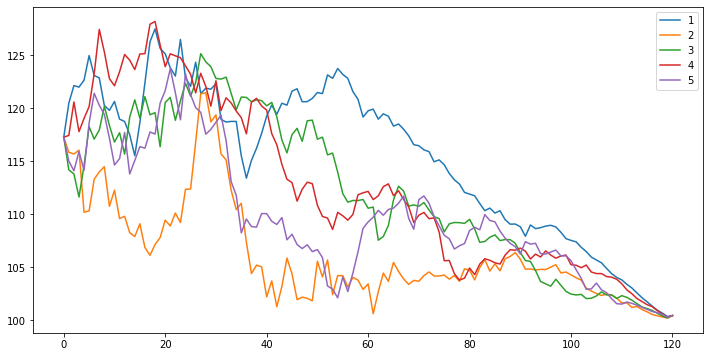

In [12]:
erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(figsize=(12,6))

In [13]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,120.478,115.828,114.173,117.429,115.007
2,122.136,115.676,113.794,120.588,114.089
3,121.988,116.04,111.611,117.784,115.912
4,122.647,110.174,114.581,119.037,114.145
...,...,...,...,...,...
116,101.306,100.516,100.897,101.263,100.803
117,100.916,100.404,100.64,100.902,100.686
118,100.653,100.282,100.384,100.556,100.532
119,100.323,100.19,100.194,100.289,100.272


In [14]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [16]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)

1    0.028328
2    0.032101
3    0.029666
4    0.029521
dtype: float64

In [18]:
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.306,100.516,100.897
117,100.916,100.404,100.64
118,100.653,100.282,100.384
119,100.323,100.19,100.194
120,100.417,100.417,100.417


In [19]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,171.68,122.782,143.867
117,165.142,123.786,141.091
118,171.127,124.961,136.001
119,169.626,135.352,136.299
120,171.171,146.281,132.611


In [20]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,148.522,136.044,131.82
2,153.566,135.883,131.065
3,153.517,137.076,125.819
4,155.835,122.482,133.496


In [22]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
# let's construct a mix of 30 year and 10 year bond
rets_bonds = 0.6*rets_10 + 0.4*rets_30
rets_bonds.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.0636746,0.045563,-0.0139978,-0.0345804,0.00620629,-0.0242437,0.000676807,0.00685432,-0.041307,0.0202066,...,-0.0128265,0.0137058,-0.0266742,0.0314278,-0.00413381,-0.00232949,-0.0262022,-0.0173493,0.0292664,0.038184
2,-0.028374,0.0250397,0.00212015,-0.000827059,0.0449268,-0.00772404,-0.0238395,-0.0140119,0.00645704,0.0088615,...,-0.0325424,-0.0229711,-0.0211045,0.0230142,0.00972572,0.0795811,0.0284039,0.053324,-0.0497035,-0.0477635
3,-0.0335467,0.00227801,0.00878957,-0.0240525,-0.0306812,0.0280048,-0.0699645,0.0459937,0.00348564,0.0189771,...,0.0324697,0.0567594,0.0127332,0.019558,-0.0277973,0.0112241,0.00485632,-0.0123762,0.00824842,0.00103058
4,0.0367445,0.012413,-0.0695482,0.0439374,0.0202458,-0.0185508,0.00367553,-0.00428763,0.0176971,-0.0191453,...,0.0194835,0.00929377,-0.0080369,0.00537797,-0.0315347,-0.0135344,0.0252444,-0.0557652,0.0496296,-0.0375195
5,0.00728725,0.0336048,0.00581161,0.0528858,0.0184641,0.063739,0.0223048,-0.0318442,0.00201049,0.0466256,...,-0.0454069,0.0513344,0.0132793,-0.00255192,0.0261044,-0.000181071,0.0100741,0.0352676,-0.022462,0.0347167


In [24]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.036492,0.003799,0.309204,4.102887,-0.001318,-0.000824,1.66307,-0.00062


In [25]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [27]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [28]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.057786,0.004257,-0.103335,2.738026,-0.002638,-0.002099,6.352114,0.0
